## Credit Card Fraud Detection using Linear Learner

## Initial Data Processing

Download/Get dataset

In [ ]:
#%%bash
#wget https://s3-us-west-2.amazonaws.com/sagemaker-e2e-solutions/fraud-detection/creditcardfraud.zip
#unzip creditcardfraud.zip

In [1]:
#import all the needed libraries.
import pandas as pd
import numpy as np
from datetime import datetime
import io
import sagemaker.amazon.common as smac

import boto3
from sagemaker import get_execution_role
import sagemaker

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pre-requisites: create S3 bucket, upload files, set IAM roles for Sagemaker to access to S3 bucket

role = get_execution_role()
bucket ='sagemaker-ml-lab-tx'
sub_folder = 'datasets'
data_key = 'creditcard.csv'
data_location = 's3://{}/{}/{}'.format(bucket, sub_folder, data_key)
print(data_location)

s3://sagemaker-ml-lab-tx/datasets/creditcard.csv


In [ ]:
#Read CSV from S3
#df = pd.read_csv(data_location, low_memory=False)
#df.head()

In [3]:
import numpy as np 
import pandas as pd

data = pd.read_csv('creditcard.csv', delimiter=',')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


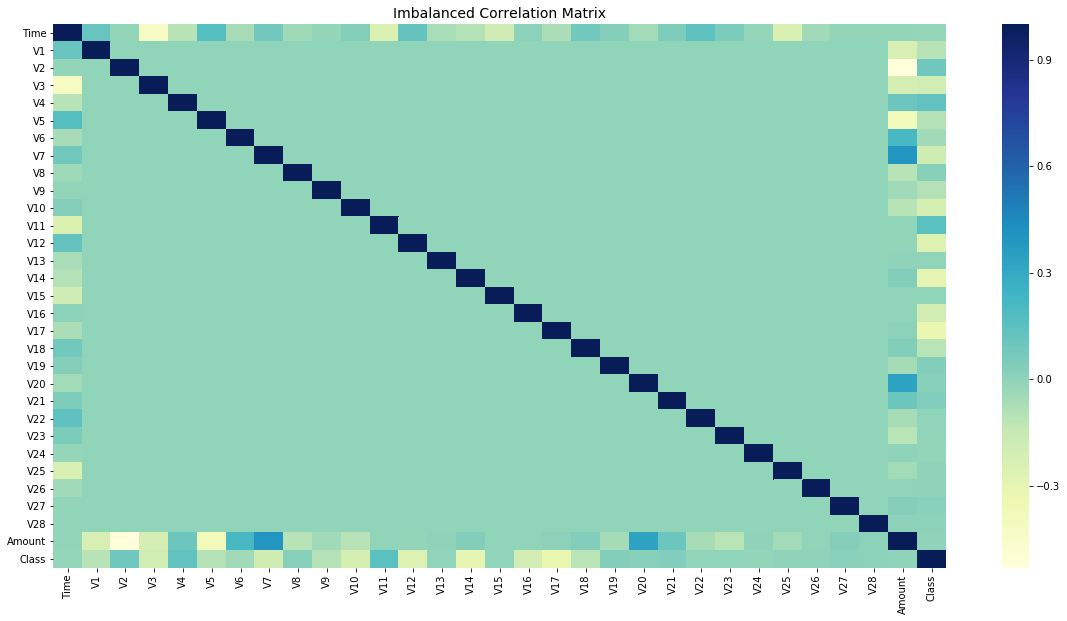

In [6]:
fig, ax = plt.subplots(figsize=(20,10))         
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [7]:
print(data.columns)
data[['Time', 'V1', 'V2', 'V27', 'V28', 'Amount', 'Class']].describe()

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


,Time,V1,V2,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#Check % frauds/non-frauds
nonfrauds, frauds = data.groupby('Class').size()
print('Number of frauds: ', frauds)
print('Number of non-frauds: ', nonfrauds)
print('Percentage of fradulent data:', 100.*frauds/(frauds + nonfrauds))

('Number of frauds: ', 492)
('Number of non-frauds: ', 284315)
('Percentage of fradulent data:', 0.1727485630620034)


In [9]:
feature_columns = data.columns[:-1]
label_column = data.columns[-1]

features = data[feature_columns].values.astype('float32')
labels = (data[label_column].values).astype('float32')

### Prepare Data and Upload to S3

In [10]:
#Convert NumPy n-dimensional arrays into a the Record-IO format

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, features, labels)
buf.seek(0);

In [11]:
#upload the data to S3 using boto3.

import boto3
import os
import sagemaker

session = sagemaker.Session()
bucket = "sagemaker-ml-lab-tx"

prefix = 'fraud-linear-learner'
key = 'recordio-pb-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('Uploaded training data location: {}'.format(s3_train_data))

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Uploaded training data location: s3://sagemaker-ml-lab-tx/fraud-linear-learner/train/recordio-pb-data
Training artifacts will be uploaded to: s3://sagemaker-ml-lab-tx/fraud-linear-learner/output


Train a Linear Learner using SageMaker's built-in algorithm - https://docs.aws.amazon.com/sagemaker/latest/dg/algos.html

In [12]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [13]:
from sagemaker import get_execution_role

linear = sagemaker.estimator.Estimator(container,
                                       get_execution_role(), 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=session)
linear.set_hyperparameters(feature_dim=features.shape[1],
                           predictor_type='binary_classifier',
                           mini_batch_size=200)

linear.fit({'train': s3_train_data})

2020-04-06 01:28:48 Starting - Starting the training job...
2020-04-06 01:28:49 Starting - Launching requested ML instances......
2020-04-06 01:29:54 Starting - Preparing the instances for training......
2020-04-06 01:31:19 Downloading - Downloading input data
2020-04-06 01:31:19 Training - Downloading the training image...
2020-04-06 01:31:39 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/06/2020 01:31:42 INFO 140038337955648] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'b

[2020-04-06 01:33:03.786] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 5, "duration": 40440, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.007420676830872172, "sum": 0.007420676830872172, "min": 0.007420676830872172}}, "EndTime": 1586136783.786525, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1586136783.786429}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005714684001750867, "sum": 0.005714684001750867, "min": 0.005714684001750867}}, "EndTime": 1586136783.786608, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1586136783.786589}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00764150966

[2020-04-06 01:33:43.861] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 7, "duration": 40068, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.006549438021768387, "sum": 0.006549438021768387, "min": 0.006549438021768387}}, "EndTime": 1586136823.861996, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1586136823.861887}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005025194310171142, "sum": 0.005025194310171142, "min": 0.005025194310171142}}, "EndTime": 1586136823.862113, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 2}, "StartTime": 1586136823.862092}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00668306904

[2020-04-06 01:34:24.470] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 9, "duration": 40601, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.006084246800583264, "sum": 0.006084246800583264, "min": 0.006084246800583264}}, "EndTime": 1586136864.470915, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1586136864.470814}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004734352222582315, "sum": 0.004734352222582315, "min": 0.004734352222582315}}, "EndTime": 1586136864.471016, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1586136864.470995}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00608026081

[2020-04-06 01:35:04.718] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 11, "duration": 40241, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005935612929987543, "sum": 0.005935612929987543, "min": 0.005935612929987543}}, "EndTime": 1586136904.719063, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1586136904.718967}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00456818941899502, "sum": 0.00456818941899502, "min": 0.00456818941899502}}, "EndTime": 1586136904.719144, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1586136904.719125}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0058136689134

[2020-04-06 01:35:44.626] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 13, "duration": 39900, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0058892577600644464, "sum": 0.0058892577600644464, "min": 0.0058892577600644464}}, "EndTime": 1586136944.62651, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1586136944.626425}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00446592462031312, "sum": 0.00446592462031312, "min": 0.00446592462031312}}, "EndTime": 1586136944.626588, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1586136944.626569}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00554649113

[2020-04-06 01:36:24.483] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 15, "duration": 39850, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0058533179610339775, "sum": 0.0058533179610339775, "min": 0.0058533179610339775}}, "EndTime": 1586136984.484119, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1586136984.484031}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004399524276573839, "sum": 0.004399524276573839, "min": 0.004399524276573839}}, "EndTime": 1586136984.484187, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1586136984.484175}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0053103

[2020-04-06 01:37:04.572] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 17, "duration": 40081, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005816639547466479, "sum": 0.005816639547466479, "min": 0.005816639547466479}}, "EndTime": 1586137024.572721, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 7}, "StartTime": 1586137024.572623}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00434483946053497, "sum": 0.00434483946053497, "min": 0.00434483946053497}}, "EndTime": 1586137024.57281, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 7}, "StartTime": 1586137024.572791}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00511377348436

[2020-04-06 01:37:44.525] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 19, "duration": 39946, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005781664339991632, "sum": 0.005781664339991632, "min": 0.005781664339991632}}, "EndTime": 1586137064.525967, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1586137064.525875}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0043027023987071535, "sum": 0.0043027023987071535, "min": 0.0043027023987071535}}, "EndTime": 1586137064.526068, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 8}, "StartTime": 1586137064.526047}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0049472

[2020-04-06 01:38:24.676] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 21, "duration": 40143, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005747315614697461, "sum": 0.005747315614697461, "min": 0.005747315614697461}}, "EndTime": 1586137104.676263, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 9}, "StartTime": 1586137104.676168}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004282529243932556, "sum": 0.004282529243932556, "min": 0.004282529243932556}}, "EndTime": 1586137104.676346, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 9}, "StartTime": 1586137104.676327}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0048128452

[2020-04-06 01:39:04.642] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 23, "duration": 39959, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005713875595319315, "sum": 0.005713875595319315, "min": 0.005713875595319315}}, "EndTime": 1586137144.642779, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 10}, "StartTime": 1586137144.64268}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0042454643781379316, "sum": 0.0042454643781379316, "min": 0.0042454643781379316}}, "EndTime": 1586137144.642867, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 10}, "StartTime": 1586137144.642848}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004702

[2020-04-06 01:39:44.747] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 25, "duration": 40097, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.0056820790946622264, "sum": 0.0056820790946622264, "min": 0.0056820790946622264}}, "EndTime": 1586137184.747369, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1586137184.747251}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004223927885563417, "sum": 0.004223927885563417, "min": 0.004223927885563417}}, "EndTime": 1586137184.747503, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1586137184.74748}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004612

[2020-04-06 01:40:25.181] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 27, "duration": 40425, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005650635345752633, "sum": 0.005650635345752633, "min": 0.005650635345752633}}, "EndTime": 1586137225.181625, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 12}, "StartTime": 1586137225.181523}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004216853727869757, "sum": 0.004216853727869757, "min": 0.004216853727869757}}, "EndTime": 1586137225.181708, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 12}, "StartTime": 1586137225.181689}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00454124

[2020-04-06 01:41:05.230] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 29, "duration": 40041, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005620591469178384, "sum": 0.005620591469178384, "min": 0.005620591469178384}}, "EndTime": 1586137265.230753, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 13}, "StartTime": 1586137265.230656}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.004178281945923312, "sum": 0.004178281945923312, "min": 0.004178281945923312}}, "EndTime": 1586137265.230835, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 13}, "StartTime": 1586137265.230815}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00448250


2020-04-06 01:41:55 Uploading - Uploading generated training model[2020-04-06 01:41:45.107] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 31, "duration": 39870, "num_examples": 1425, "num_bytes": 47847576}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.005591145085172173, "sum": 0.005591145085172173, "min": 0.005591145085172173}}, "EndTime": 1586137305.108036, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 14}, "StartTime": 1586137305.107941}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.00414762033569153, "sum": 0.00414762033569153, "min": 0.00414762033569153}}, "EndTime": 1586137305.108143, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 14}, "StartTime": 1586137305.108121}

#metrics {"Metrics": {"train_binary_classif

[2020-04-06 01:41:51.522] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 38, "duration": 3770, "num_examples": 1425, "num_bytes": 47847576}
[04/06/2020 01:41:51 INFO 140038337955648] #train_score (algo-1) : ('binary_classification_cross_entropy_objective', 0.004155472405855248)
[04/06/2020 01:41:51 INFO 140038337955648] #train_score (algo-1) : ('binary_classification_accuracy', 0.9993469261640339)
[04/06/2020 01:41:51 INFO 140038337955648] #train_score (algo-1) : ('binary_f_1.000', 0.7951541850220264)
[04/06/2020 01:41:51 INFO 140038337955648] #train_score (algo-1) : ('precision', 0.8677884615384616)
[04/06/2020 01:41:51 INFO 140038337955648] #train_score (algo-1) : ('recall', 0.733739837398374)
[04/06/2020 01:41:51 INFO 140038337955648] #quality_metric: host=algo-1, train binary_classification_cross_entropy_objective <loss>=0.00415547240586
[04/06/2020 01:41:51 INFO 140038337955648] #quality_metric: host=algo-1, train binary_classification_accurac

### Create Sagemaker Endpoint for Inferencing

In [14]:
linear_predictor = linear.deploy(initial_instance_count=1,
                                 endpoint_name="fraud-detection-demo-endpoint",
                                 instance_type='ml.m4.xlarge')

-------------!

In [15]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Specify input and output formats.
linear_predictor.content_type = 'text/csv'
linear_predictor.serializer = csv_serializer
linear_predictor.deserializer = json_deserializer

## Clean up

Amazon SageMaker console > Endpoints > Delete Endpoint or run `linear_predictor.delete_endpoint()`